### Лабораторная работа №13 Решение задач кластеризации

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
X = df.iloc[:,1:14]
Y = df.iloc[:,0]

In [15]:
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

Используем метод главных компонент для уменьшения размерности (сделаем 2 компоненты), чтобы далее визуализировать кластеры

In [20]:
from sklearn.decomposition import PCA
import pylab as pl

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

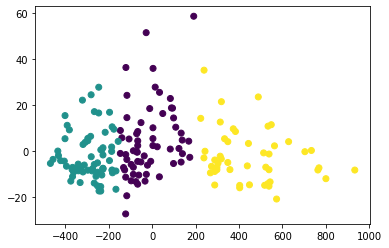

In [21]:
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(X)

pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()

**Оценка качества**

Гомогенность (пример https://habr.com/ru/company/ods/blog/325654/) - измеряет, насколько каждый кластер состоит из объектов одного класса

In [16]:
from sklearn import metrics

metrics.homogeneity_score(Y, kmeans.labels_)

0.42881231997856467

**Полнота** - насколько объекты одного класса относятся к одному кластеру:

In [17]:
metrics.completeness_score(Y, kmeans.labels_)

0.42870141389448596

Для учёта обеих величин *h* и *c* одновременно вводится ***v*-мера**, как их среднее гармоническое. Она является симметричной и показывает, насколько две кластеризации схожи между собой:

In [18]:
metrics.v_measure_score(Y, kmeans.labels_)

0.42875685976453554

**Силуэт** показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне [-1,1]. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам.

In [19]:
metrics.silhouette_score(X, kmeans.labels_)

0.571138193786884